In [65]:
#Georgia Sugisandhea_535230080_Kelas C
import pandas as pd #Mengimport library pandas sebagai variable pd
import numpy as np #Mengimport library numpy sebagai variable np
import seaborn as sns #Mengimport library seaborn sebagai variable sns
import matplotlib.pyplot as plt #Mengimport library sebagai matplotlib.pyplot sebagai variable plt

In [66]:
file = "titanicFull.csv" #Mencantumkan file yang akan kita pakai
df = pd.read_csv(file) #Membaca file yang sudah dicantumkan dengan pandas dan memasukkannya ke variable df
df.head(4) #Menampilkan 4 baris pertama dari tabel df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S


In [67]:
df.iloc[-6] #Mengambil baris ke 6 dari bawah

pclass                          3
survived                        0
name        Yousseff, Mr. Gerious
sex                          male
age                           NaN
sibsp                           0
parch                           0
ticket                       2627
fare                      14.4583
cabin                         NaN
embarked                        C
Name: 1303, dtype: object

In [68]:
df.info() #Melihat info dari tabel df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   cabin     295 non-null    object 
 10  embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [69]:
df.shape #Melihat jumlah baris dan kolom yang ada di tabel df

(1309, 11)

In [70]:
df.columns #Melihat nama nama kolom dari tabel df

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')

In [71]:
#Mengganti nama kolom pclass menjadi ticketClass, sibsp menjadi siblingsSpouses, parch menjadi pada tabel df
df.rename(index=str, columns={"pclass":"ticketClass", "sibsp":"siblingsSpouses", "parch":"parentsChildren"}, inplace=True)
df.columns #Menampilkan nama nama kolom dari tabel df

Index(['ticketClass', 'survived', 'name', 'sex', 'age', 'siblingsSpouses',
       'parentsChildren', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [72]:
duplicated = df.duplicated().sum() #Menghitung berapa jumlah baris yang duplikat
print("There are %d duplicated records" %(duplicated)) #Menampilkan hasilnya

There are 0 duplicated records


In [73]:
dff = df.copy() #Mengcopy tabel df ke variable dff

In [74]:
missingDataSummary = dff.isna().sum() #Menghitung berapa jumlah baris yang berisi NaN dari setiap kolom dff
missingDataPercentage = (dff.isnull().sum()/dff.shape[0]) #Menghitung persentasi baris data NaN tersebut dibanding keseluruhan jumlah baris data
#Menggabung 2 variable data missingDataSummary dan missingDataPercentage menjadi satu di variable yaitu missingData
missingData = pd.concat([missingDataSummary, missingDataPercentage], axis=1, keys=['Missing', 'Percentage']) 
missingData.sort_values(ascending=False, by='Missing') #Mengurutkan data yang ada pada variable missingData dari besar hingga kecil(descending/ascending=false)

,Missing,Percentage
cabin,1014,0.774637
age,263,0.200917
embarked,2,0.001528
fare,1,0.000764
ticketClass,0,0.000000
survived,0,0.000000
name,0,0.000000
sex,0,0.000000
siblingsSpouses,0,0.000000
parentsChildren,0,0.000000


In [75]:
dffClean = dff.drop(columns='cabin') #Menghapus kolom 'cabin' dari dff dan memasukkannya ke tabel dffClean
dffClean.isna().sum().sort_values(ascending=False) #Menampilkan jumlah jumlah baris yang berisi NaN dalam masing masing kolom dan diurutkan dari besar ke kecil

age                263
embarked             2
fare                 1
ticketClass          0
survived             0
name                 0
sex                  0
siblingsSpouses      0
parentsChildren      0
ticket               0
dtype: int64

In [76]:
dffClean.info() #Menampilkan info dari dffClean
dff.isna().sum() #Menampilkan jumlah baris yang berisi NaN dari masing masing kolom di dff
dffClean[dffClean['embarked'].isna()] #Menampilkan baris baris yang memiliki isi NaN di kolom embarked dari dffClean


<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ticketClass      1309 non-null   int64  
 1   survived         1309 non-null   int64  
 2   name             1309 non-null   object 
 3   sex              1309 non-null   object 
 4   age              1046 non-null   float64
 5   siblingsSpouses  1309 non-null   int64  
 6   parentsChildren  1309 non-null   int64  
 7   ticket           1309 non-null   object 
 8   fare             1308 non-null   float64
 9   embarked         1307 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 112.5+ KB


,ticketClass,survived,name,sex,age,siblingsSpouses,parentsChildren,ticket,fare,embarked
168,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [77]:
#Mengganti isi kolom embarked di baris baris yang isi kolom embarkednya NaN menjadi mode dari kolom embarked
dffClean['embarked']=dffClean['embarked'].fillna(dffClean['embarked'].mode()[0]) 

#Menampilkan jumlah baris yang berisi NaN dari setiap kolom dffClean
dffClean.isna().sum().sort_values(ascending=False)


age                263
fare                 1
ticketClass          0
survived             0
name                 0
sex                  0
siblingsSpouses      0
parentsChildren      0
ticket               0
embarked             0
dtype: int64

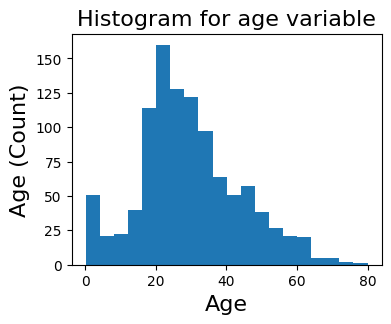

In [78]:
#Membuat histogram akan banyaknya masing masing tahun usia pada dffClean kolom 'age' menggunakan pandas
plt.figure(figsize=(4,3), dpi=100)
ax = dffClean['age'].hist(bins=20)
ax.set_title("Histogram for age variable", fontsize=16)
ax.set_xlabel('Age', fontsize=16)
ax.set_ylabel('Age (Count)', fontsize=16, rotation=90)
ax.grid(False)

Text(0, 0.5, 'Age (Count)')

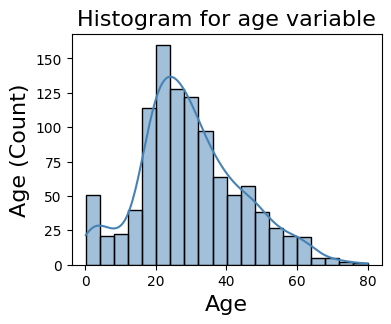

In [79]:
#Membuat histogram akan banyaknya masing masing tahun usia pada dffClean kolom 'age' menggunakan seaborn
plt.figure(figsize=(4,3), dpi=100)
g = sns.histplot(dffClean, x='age', kde=True, color='steelblue', bins=20)
g.set_title("Histogram for age variable", fontsize=16)
g.set_xlabel('Age', fontsize=16)
g.set_ylabel('Age (Count)', fontsize=16, rotation=90)

Text(0, 0.5, 'Age (Count)')

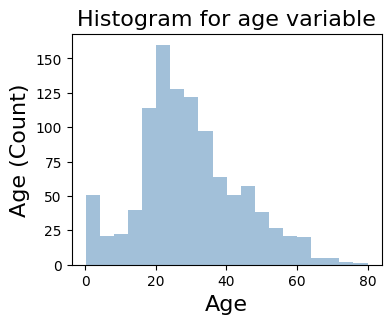

In [80]:
#Membuat histogram akan banyaknya masing masing tahun usia pada dffClean kolom 'age' menggunakan matplotlib
plt.figure(figsize=(4,3), dpi=100)
plt.hist(dffClean['age'], bins=20, alpha=0.5, density=False, histtype='stepfilled', color='steelblue', edgecolor='none')
plt.title("Histogram for age variable", fontsize=16)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Age (Count)', fontsize=16, rotation=90)

In [81]:
dffClean.info() #Menampilkan info dari tabel dffClean
dff.isna().sum() #Menampilkan jumlah baris yang berisi NaN dari masing masing kolom pada tabel dff
dffClean[dffClean['age'].isna()] #Menampilkan baris baris dffClean yang kolom age nya berisi NaN   

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ticketClass      1309 non-null   int64  
 1   survived         1309 non-null   int64  
 2   name             1309 non-null   object 
 3   sex              1309 non-null   object 
 4   age              1046 non-null   float64
 5   siblingsSpouses  1309 non-null   int64  
 6   parentsChildren  1309 non-null   int64  
 7   ticket           1309 non-null   object 
 8   fare             1308 non-null   float64
 9   embarked         1309 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 144.8+ KB


,ticketClass,survived,name,sex,age,siblingsSpouses,parentsChildren,ticket,fare,embarked
15,1,0,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,S
37,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.5500,S
40,1,0,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,C
46,1,0,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,S
59,1,1,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,NaN,0,0,17770,27.7208,C
...,...,...,...,...,...,...,...,...,...,...
1293,3,0,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.0500,S
1297,3,0,"Wiseman, Mr. Phillippe",male,NaN,0,0,A/4. 34244,7.2500,S
1302,3,0,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.2250,C
1303,3,0,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,C


In [82]:
#Mengisi baris baris di kolom 'age' yang NaN dengan median dari keseluruhan age yang ada
dffClean['age'] = dffClean['age'].fillna(dffClean['age'].median())
 #Menampilkan jumlah baris yang berisi NaN dari masing masing kolom pada tabel dff denga urutan dari terbesar ke terkecil
dffClean.isna().sum().sort_values(ascending=False)

fare               1
ticketClass        0
survived           0
name               0
sex                0
age                0
siblingsSpouses    0
parentsChildren    0
ticket             0
embarked           0
dtype: int64

Text(0, 0.5, 'Age (Count)')

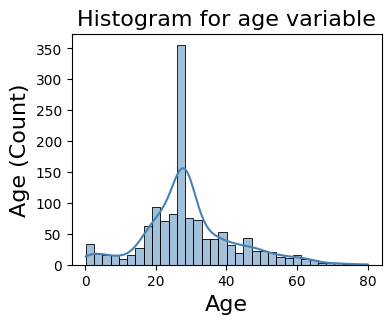

In [83]:
#Kembalii menampilkan histogram dari jumlah umur dari masing masing tahun umur setelah pengisian baris NaN
plt.figure(figsize=(4,3), dpi=100)
g = sns.histplot(dffClean, x='age', kde=True, color='steelblue')
g.set_title("Histogram for age variable",fontsize=16)
g.set_xlabel('Age', fontsize=16)
g.set_ylabel('Age (Count)', fontsize=16, rotation=90)


In [84]:
#Menampilkan baris yang isi kolom 'fare' nya adalah NaN
dffClean[dffClean['fare'].isna()]

,ticketClass,survived,name,sex,age,siblingsSpouses,parentsChildren,ticket,fare,embarked
1225,3,0,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [85]:
#Menampilkan value-value yang unik dari baris baris di kolom ticketClass
dffClean['ticketClass'].unique()

array([1, 2, 3], dtype=int64)

In [86]:
#Melihat ticketClass apa yang memiliki fare NaN
ticketClass = dff[dffClean['fare'].isna()]['ticketClass']

#Jika memang ada ticketClass, 
if(len(ticketClass)>0):
    #Menghitung median fare dari baris baris yang memiliki ticketClass sesuai yang ditemukan
    fareMedian = dffClean[dffClean['ticketClass']==ticketClass[0]]['fare'].median()

    #Mengisi baris dari kolom fare yang NaN dengan median yang telah kita hitung
    dffClean['fare'] = dffClean['fare'].fillna(fareMedian)
#Menampilkan baris yang isi kolom 'fare' nya adalah NaN
dffClean.isna().sum().sort_values(ascending=False)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10904\3196975619.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fareMedian = dffClean[dffClean['ticketClass']==ticketClass[0]]['fare'].median()


ticketClass        0
survived           0
name               0
sex                0
age                0
siblingsSpouses    0
parentsChildren    0
ticket             0
fare               0
embarked           0
dtype: int64

In [87]:
#Mencantumkan file titanicClean ke dalam variable file
file = "titanicClean.csv"
#Menyimpan data di variable dffClean ke file titanicClean menggunakan pandas
dffClean.to_csv(file, index=False)

In [88]:
#Membaca file titanicClean dan memasukkannya ke variable titanicClean
titanicClean = pd.read_csv(file)
#Menampilkan info dari tabel yang ada di variable titanicClean
titanicClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ticketClass      1309 non-null   int64  
 1   survived         1309 non-null   int64  
 2   name             1309 non-null   object 
 3   sex              1309 non-null   object 
 4   age              1309 non-null   float64
 5   siblingsSpouses  1309 non-null   int64  
 6   parentsChildren  1309 non-null   int64  
 7   ticket           1309 non-null   object 
 8   fare             1309 non-null   float64
 9   embarked         1309 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 102.4+ KB


In [89]:
#Mendapatkan statistik deskriptif dari kolom kolom yang telah disebutkan
titanicClean[['survived', 'age', 'siblingsSpouses', 'parentsChildren', 'fare']].describe()

,survived,age,siblingsSpouses,parentsChildren,fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,0.381971,29.503186,0.498854,0.385027,33.276193
std,0.486055,12.905241,1.041658,0.865560,51.743584
min,0.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,35.000000,1.000000,0.000000,31.275000
max,1.000000,80.000000,8.000000,9.000000,512.329200


In [90]:
#Membuat kolom baru pada titanicClean bernama familySize yang berisi penjumlahan angka pada kolom siblingsSpouses dan parentsChildren +1
titanicClean["familySize"] = titanicClean["siblingsSpouses"] + titanicClean["parentsChildren"] + 1

In [91]:
#Mencari baris pada kolom name yang mengandung kata Palsson
titanicClean[titanicClean['name'].str.contains("Palsson")]

,ticketClass,survived,name,sex,age,siblingsSpouses,parentsChildren,ticket,fare,embarked,familySize
1096,3,0,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,S,5
1097,3,0,"Palsson, Master. Paul Folke",male,6.0,3,1,349909,21.075,S,5
1098,3,0,"Palsson, Miss. Stina Viola",female,3.0,3,1,349909,21.075,S,5
1099,3,0,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.075,S,5
1100,3,0,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,S,5


In [92]:
#Mencari kelompok keluarga, baris baris yang memiliki familySize terbesar
#Solution1
titanicClean[titanicClean['familySize']==max(titanicClean["familySize"])]

,ticketClass,survived,name,sex,age,siblingsSpouses,parentsChildren,ticket,fare,embarked,familySize
1170,3,0,"Sage, Master. Thomas Henry",male,28.0,8,2,CA. 2343,69.55,S,11
1171,3,0,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,S,11
1172,3,0,"Sage, Miss. Ada",female,28.0,8,2,CA. 2343,69.55,S,11
1173,3,0,"Sage, Miss. Constance Gladys",female,28.0,8,2,CA. 2343,69.55,S,11
1174,3,0,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,CA. 2343,69.55,S,11
1175,3,0,"Sage, Miss. Stella Anna",female,28.0,8,2,CA. 2343,69.55,S,11
1176,3,0,"Sage, Mr. Douglas Bullen",male,28.0,8,2,CA. 2343,69.55,S,11
1177,3,0,"Sage, Mr. Frederick",male,28.0,8,2,CA. 2343,69.55,S,11
1178,3,0,"Sage, Mr. George John Jr",male,28.0,8,2,CA. 2343,69.55,S,11
1179,3,0,"Sage, Mr. John George",male,28.0,1,9,CA. 2343,69.55,S,11


In [93]:
#Solution2 dari mencari kelompok keluarga, baris baris yang memiliki familySize terbesar
biggestfamily = np.where(titanicClean["familySize"] == max(titanicClean["familySize"]))

titanicClean.iloc[biggestfamily]

,ticketClass,survived,name,sex,age,siblingsSpouses,parentsChildren,ticket,fare,embarked,familySize
1170,3,0,"Sage, Master. Thomas Henry",male,28.0,8,2,CA. 2343,69.55,S,11
1171,3,0,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,S,11
1172,3,0,"Sage, Miss. Ada",female,28.0,8,2,CA. 2343,69.55,S,11
1173,3,0,"Sage, Miss. Constance Gladys",female,28.0,8,2,CA. 2343,69.55,S,11
1174,3,0,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,CA. 2343,69.55,S,11
1175,3,0,"Sage, Miss. Stella Anna",female,28.0,8,2,CA. 2343,69.55,S,11
1176,3,0,"Sage, Mr. Douglas Bullen",male,28.0,8,2,CA. 2343,69.55,S,11
1177,3,0,"Sage, Mr. Frederick",male,28.0,8,2,CA. 2343,69.55,S,11
1178,3,0,"Sage, Mr. George John Jr",male,28.0,8,2,CA. 2343,69.55,S,11
1179,3,0,"Sage, Mr. John George",male,28.0,1,9,CA. 2343,69.55,S,11


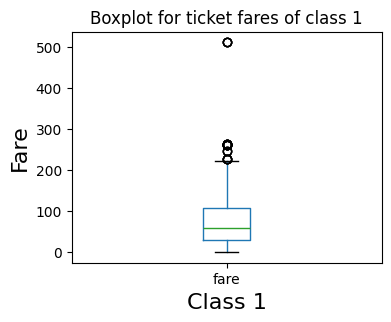

In [94]:
#Membuat boxplot dari persebaran harga tiket kelas 1 menggunakan pandas
plt.figure(figsize=(4,3), dpi=100)
ax = titanicClean[titanicClean['ticketClass']==1].boxplot(column='fare')
ax.set_title("Boxplot for ticket fares of class 1")
ax.set_ylabel('Fare', fontsize=16, rotation=90)
ax.set_xlabel('Class 1', fontsize=16)
ax.grid(False)

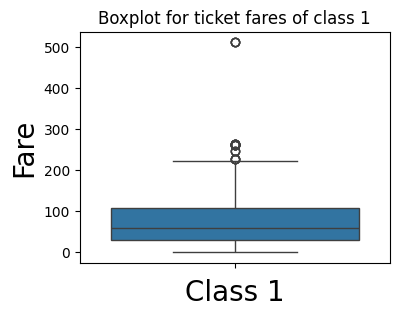

In [95]:
#Membuat boxplot dari persebaran harga tiket kelas 1 menggunakan seaborn
d = titanicClean[titanicClean['ticketClass']==1]
plt.subplots(figsize=(4,3), dpi=100)
ax = sns.boxplot(y="fare", data=d)
ax.set_title("Boxplot for ticket fares of class 1")
ax.set_ylabel('Fare', fontsize=20, rotation=90)
ax.set_xlabel('Class 1', fontsize=20)
ax.grid(False)

In [96]:
#Mengambil harga harga fare dari ticketClass 1
fareClass1 = titanicClean[titanicClean['ticketClass']==1]['fare']

#Menghitung standar deviasi dari harga fare ticketClass 1
fareStd = np.std(fareClass1)

#Menghitung rata rata dari harga fare ticketClass 1
fareMean = np.mean(fareClass1)

#Mencari angka angka fare ticketClass 1 yang berada diluar persebaran
fareOutliers = fareClass1[(fareClass1>fareMean+3*fareStd) | (fareClass1<fareMean-3*fareStd)]

#Menampilkan hasilnya
print("Mean=%.3f and standard deviation=%.3f of ticket fares for class 1" %(fareMean, fareStd))

print("The following could be considered as outilers %s" % (fareOutliers))

Mean=87.509 and standard deviation=80.323 of ticket fares for class 1
The following could be considered as outilers 49     512.3292
50     512.3292
183    512.3292
302    512.3292
Name: fare, dtype: float64


In [97]:
#Cara menampilkan baris baris yang merupakah outliers/diluar penyebaran
#Solution1
titanicClean[titanicClean['fare']==fareOutliers.iloc[0]]


,ticketClass,survived,name,sex,age,siblingsSpouses,parentsChildren,ticket,fare,embarked,familySize
49,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C,2
50,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,C,2
183,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C,1
302,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C,1


In [98]:
#Solution 2 dari cara menampilkan baris baris yang merupakah outliers/diluar penyebaran
titanicClean.loc[fareOutliers.index]

,ticketClass,survived,name,sex,age,siblingsSpouses,parentsChildren,ticket,fare,embarked,familySize
49,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C,2
50,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,C,2
183,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C,1
302,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C,1


In [99]:
#Mengelompokkan data seesuai value di kolom 'embarked'
embarked = titanicClean.groupby('embarked').count()

<Figure size 400x300 with 0 Axes>

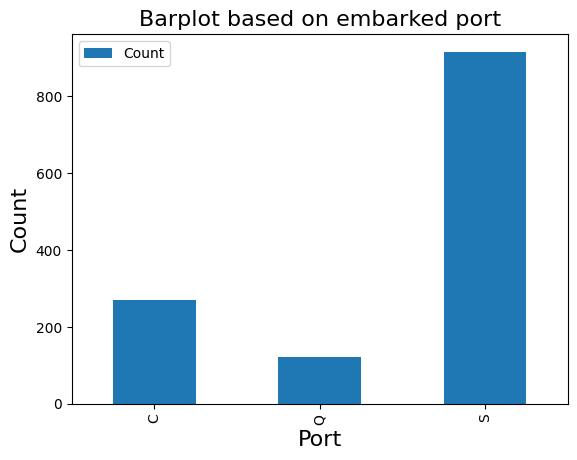

In [100]:
#Membuat barplot tentang data embarked menggunakan pandas
embarkedDf = pd.DataFrame({'Port': embarked.index, 'Count':embarked['ticketClass']})
plt.figure(figsize=(4,3), dpi=100)
ax = embarkedDf.plot.bar(x='Port', y='Count')
ax.set_title("Barplot based on embarked port", fontsize=16)
ax.set_ylabel('Count', fontsize=16, rotation=90)
ax.set_xlabel('Port', fontsize=16)
ax.grid(False)

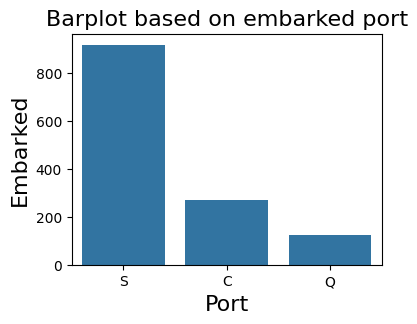

In [101]:
#Membuat barplot tentang data embarked menggunakan seaborn
plt.subplots(figsize=(4,3), dpi=100)
ax = sns.countplot(data=titanicClean, x='embarked')
ax.set_title("Barplot based on embarked port", fontsize=16)
ax.set_xlabel('Port', fontsize=16)
ax.set_ylabel('Embarked', fontsize=16, rotation=90)
ax.grid(False)

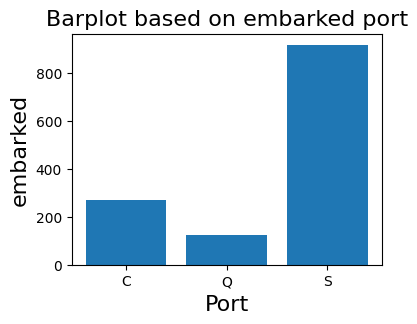

In [102]:
#Membuat barplot tentang data embarked menggunakan matplotlib
embarked = titanicClean.groupby('embarked').count()['ticketClass']
plt.figure(figsize=(4,3), dpi=100)
plt.bar(embarked.index, embarked)
plt.title("Barplot based on embarked port", fontsize=16)
plt.xlabel('Port', fontsize=16)
plt.ylabel('embarked', fontsize=16, rotation=90)
ax.grid(False)

In [103]:
#Mengekstrak huruf pertama dari kata kata yang dimasukkan
sr = pd.Series(['New_York', 'Lisbon', 'Tokyo', 'Paris', 'Munich'])
sr.str.extract('([auieo])')
sr.str.extract(pat = '([auieo])')

#Mengekstrak urutan dari karakter alfabet (kapital dan kecil) dari masing masing kata yang dimasukkan
sr = pd.Series(['USA New_York', 'Portugal Lisbon', 'Japan Tokyo', 'France Paris', 'Germany Munich'])
sr.str.extract('([A-Za-z]+)')
sr.str.extract('([A-Za-z]+)')

,0
0,USA
1,Portugal
2,Japan
3,France
4,Germany


In [104]:
#Mengekstrak urutan dari karakter alfabet (kapital dan kecil) dari masing masing kata yang dimasukkan
s = pd.Series(['Allen, Miss. Elisabeth Walton', 'Anderson, Mr. Harry', 'Astor, Col. John Jacob'])
s.str.extract('([A-Za-z,]+)')

#Mengekstrak urutan dari karakter alfabet (kapital dan kecil) dari masing masing kata yang dimasukkan
s.str.extract('([A-Za-z,]+)')
#Mengekstrak urutan dari karakter alfabet (kapital dan kecil) dan dilanjutkan dengan titik dari masing masing kata yang dimasukkan
s.str.extract('([A-Za-z]+)\.')

#Mengekstrak urutan dari karakter alfabet (kapital dan kecil) dan dilanjutkan dengan titik dari masing masing kata yang dimasukkan
#expand=False, agar output berupa series bukan dataframe
s.str.extract('([A-Za-z]+)\.', expand=False)

<>:8: SyntaxWarning: invalid escape sequence '\.'
<>:12: SyntaxWarning: invalid escape sequence '\.'
<>:8: SyntaxWarning: invalid escape sequence '\.'
<>:12: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10904\1255464717.py:8: SyntaxWarning: invalid escape sequence '\.'
  s.str.extract('([A-Za-z]+)\.')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10904\1255464717.py:12: SyntaxWarning: invalid escape sequence '\.'
  s.str.extract('([A-Za-z]+)\.', expand=False)


0    Miss
1      Mr
2     Col
dtype: object

In [105]:
#Mengekstrak urutan dari karakter alfabet (kapital dan kecil) dan dilanjutkan dengan titik dari masing masing kata yang dimasukkan
#expand=False, agar output berupa series bukan dataframe
titanicClean['Title'] = titanicClean.name.str.extract('([A-Za-z]+)\.', expand=False)
#Mengganti ekstrak yang berupa Mlle menjadi Miss
titanicClean['Title'] = titanicClean['Title'].replace('Mlle', 'Miss')
#Mengganti ekstrak yang berupa Ms menjadi Miss
titanicClean['Title'] = titanicClean['Title'].replace('Ms', 'Miss')
#Mengganti ekstrak yang berupa Mme menjadi Mrs
titanicClean['Title'] = titanicClean['Title'].replace('Mme', 'Mrs')
#Mengganti ekstrak yang berupa kata kata yang disebutkan menjadi rare
titanicClean['Title'] = titanicClean['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10904\3260205303.py:3: SyntaxWarning: invalid escape sequence '\.'
  titanicClean['Title'] = titanicClean.name.str.extract('([A-Za-z]+)\.', expand=False)
